## Sales weekly data ByChannel

In [7]:
from mlutils import dataset
from azure.storage.blob import BlobServiceClient
from io import BytesIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import concurrent.futures

In [4]:
#python version
import sys
print(sys.version)

3.7.0 (default, Oct  9 2018, 10:31:47) 
[GCC 7.3.0]


In [5]:
import polars as pl

In [3]:
import datetime
start_date = datetime.date(2022, 10, 1)
end_date = datetime.date(2023, 10, 1)

In [4]:
import time
start = time.time()

def download_data(filename, container_name, account_name, account_key):
    
    blob_service_client = BlobServiceClient(account_url=f'https://{account_name}.blob.core.windows.net', credential=account_key)
    blob_client = blob_service_client.get_blob_client(container_name, filename)
    downloaded_blob = blob_client.download_blob()
    bytes_io = BytesIO(downloaded_blob.readall())
    blob_client.close()
    
    return pl.read_parquet(bytes_io)

In [5]:
account_name, account_key = dataset.load(name='GeorgeBlobStorage2', container='utility', path='blobdetails.txt', data_type='CSV')

In [6]:
container = 'masterdata'
cal = download_data('utilitydata/Calendar.parquet', container, account_name, account_key)

In [7]:
cal

Time_Ref,Trading_Date,Day_Of_Week,Day_Of_Year,Week_Number,Trading_Week,Trading_Year,Period_Number,Quarter_Number,Season_Key,CompDateLY,Festive_Code,Fiscal_Week_Number,Fiscal_Period_Number,Fiscal_Period_Description,Fiscal_Year_Number,Quarter_Key,Wm_Yr_Wk
i64,datetime[ns],i64,i64,i64,str,i64,i64,i64,str,datetime[ns],null,i64,i64,str,i64,str,f64
32905,1990-02-03 00:00:00,1,36,6,"""199006""",1990,2,1,"""SS90""",1989-02-04 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32906,1990-02-04 00:00:00,2,37,6,"""199006""",1990,2,1,"""SS90""",1989-02-05 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32907,1990-02-05 00:00:00,3,38,6,"""199006""",1990,2,1,"""SS90""",1989-02-06 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32908,1990-02-06 00:00:00,4,39,6,"""199006""",1990,2,1,"""SS90""",1989-02-07 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32909,1990-02-07 00:00:00,5,40,6,"""199006""",1990,2,1,"""SS90""",1989-02-08 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32910,1990-02-08 00:00:00,6,41,6,"""199006""",1990,2,1,"""SS90""",1989-02-09 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32911,1990-02-09 00:00:00,7,42,6,"""199006""",1990,2,1,"""SS90""",1989-02-10 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32912,1990-02-10 00:00:00,1,43,7,"""199007""",1990,2,1,"""SS90""",1989-02-11 00:00:00,null,0,0,"""""",0,"""Q199001""",null
32913,1990-02-11 00:00:00,2,44,7,"""199007""",1990,2,1,"""SS90""",1989-02-12 00:00:00,null,0,0,"""""",0,"""Q199001""",null


In [8]:
cal = cal[['Trading_Date', 'Week_Number', 'Trading_Year']]

In [9]:
cal

Trading_Date,Week_Number,Trading_Year
datetime[ns],i64,i64
1990-02-03 00:00:00,6,1990
1990-02-04 00:00:00,6,1990
1990-02-05 00:00:00,6,1990
1990-02-06 00:00:00,6,1990
1990-02-07 00:00:00,6,1990
1990-02-08 00:00:00,6,1990
1990-02-09 00:00:00,6,1990
1990-02-10 00:00:00,7,1990
1990-02-11 00:00:00,7,1990


##### polar

In [27]:
import time
start = time.time()

def process_data(filename, container_name):
    
    blob_service_client = BlobServiceClient(account_url=f'https://{account_name}.blob.core.windows.net', credential=account_key)
    blob_client = blob_service_client.get_blob_client(container_name, filename)
    downloaded_blob = blob_client.download_blob()
    bytes_io = BytesIO(downloaded_blob.readall())
    blob_client.close()
    
    data = pl.read_parquet(bytes_io)
    data = data.select(['Trading_Date', 'ANA_REF', 'Store_KEY', 'Unit_Sale', 'Epos_ExVAT', 'Sys_SCENE', 'Price_Code'])
    data = data.filter(pl.col('Sys_SCENE') == 0)
    data = data.filter(pl.col('Price_Code') == 'O')
    
    # creating the channel column
    data = data.with_columns(pl.when(pl.col('Store_KEY').is_in([358, 361, 857])).then('online').otherwise('retail').alias('channel'))
    
    data_joined = data.join(cal, on = 'Trading_Date', how = 'left')
    data_joined = data_joined.select(['Trading_Date', 'Unit_Sale', 'Epos_ExVAT', 'channel', 'Week_Number'])
    
    # data_agg = data_joined.groupby('Week_Number').agg(pl.sum('Epos_ExVAT'))
    # data_agg = data_joined.groupby('Week_Number').agg(pl.col('Epos_ExVAT').sum())
    # data_agg = data_joined.groupby(['Week_Number', 'channel']).agg([pl.col('Epos_ExVAT').sum().alias('Epos_ExVAT'), pl.col('Trading_Date').min().alias('Trading_Date')])
    # data_agg.sort('Trading_Date', descending=False)
    
    return data_agg

In [28]:
def get_data(start_date, end_date, directory, file_extension, container):
    
    dates = [start_date + datetime.timedelta(days=x) for x in range(0, (end_date-start_date).days)]
    dates_str = [x.strftime('%Y-%m-%d') for x in dates]
    filenames = [f'{directory}/{x}{file_extension}' for x in dates_str]
    with concurrent.futures.ThreadPoolExecutor(max_workers=50) as executor:
        results = list(executor.map(process_data, filenames, [container]*len(filenames)))

    data_frames = [df for df in results if df is not None]

    return pl.concat(data_frames)

In [29]:
test_year_sales = get_data(start_date, end_date, 'sales', '.parquet', 'masterdata')

end = time.time()
print(end - start)

171.3474621772766


In [30]:
test_year_sales

Week_Number,Epos_ExVAT
i64,f64
40,6.4927e6
40,4.0810e6
40,4.4091e6
40,4.1197e6
40,4.1948e6
40,4.3315e6
40,4.6659e6
41,5.3802e6
41,3.6748e6


In [32]:
test = test_year_sales.groupby('Week_Number').agg(pl.sum('Epos_ExVAT'))
test

Week_Number,Epos_ExVAT
i64,f64
52,1.6677e7
37,2.1558e7
11,2.2904e7
10,2.0542e7
43,2.6876e7
29,2.5811e7
45,2.8894e7
14,2.9355e7
2,1.6934e7


In [33]:
test_year_sales = test.to_pandas()

In [34]:
test_year_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Week_Number  52 non-null     int64  
 1   Epos_ExVAT   52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [37]:
test_year_sales.sort_values(by='Week_Number', inplace = True) 
test_year_sales

,Week_Number,Epos_ExVAT
40,1,1.712969e+07
8,2,1.693444e+07
41,3,1.789036e+07
34,4,1.945569e+07
17,5,2.103063e+07
48,6,2.089821e+07
49,7,2.270505e+07
19,8,2.165262e+07
18,9,2.278894e+07
3,10,2.054200e+07


In [26]:
#test_year_sales.isnull() 
test_year_sales['Epos_ExVAT'].isna().sum()

0

In [18]:
#test_year_sales.shape
# ALL SALES

In [30]:
# ONLY full price sales
test_year_sales.shape

(125305444, 5)

In [19]:
sales_weekly = test_year_sales.groupby('Week_Number', as_index=False).agg(sales_value = ('Epos_ExVAT','sum'), Trading_Date = ('Trading_Date','min'))

In [20]:
sales_weekly.sort_values(by='Trading_Date', inplace = True) 

In [21]:
sales_weekly

,Week_Number,sales_value,Trading_Date
39,40,3.795451e+07,2022-10-01
40,41,2.954099e+07,2022-10-08
41,42,2.779301e+07,2022-10-15
42,43,2.687610e+07,2022-10-22
43,44,2.539329e+07,2022-10-29
44,45,2.889425e+07,2022-11-05
45,46,3.278374e+07,2022-11-12
46,47,2.808964e+07,2022-11-19
47,48,3.062401e+07,2022-11-26
48,49,3.378518e+07,2022-12-03


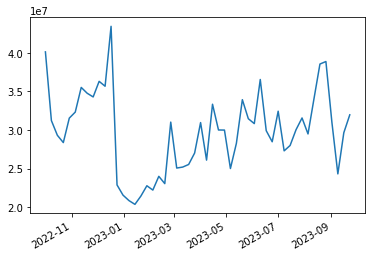

In [30]:
#sales_weekly_for_plotting = sales_weekly[['Trading_Date', 'returns_value']]
#sales_weekly_for_plotting = sales_weekly_for_plotting.set_index('Trading_Date')
#plt.plot(sales_weekly_for_plotting)
#plt.gcf().autofmt_xdate()
#plt.show()

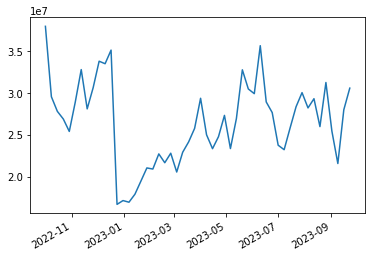

In [22]:
# FULL PRICE sales
sales_weekly_for_plotting = sales_weekly[['Trading_Date', 'sales_value']]
sales_weekly_for_plotting = sales_weekly_for_plotting.set_index('Trading_Date')
plt.plot(sales_weekly_for_plotting)
plt.gcf().autofmt_xdate()
plt.show()

## Final Table to export

In [23]:
sales_final_tbl = test_year_sales.groupby(by=['Week_Number','channel'], as_index=False).agg(sales_value = ('Epos_ExVAT','sum'), sales_volume = ('Unit_Sale','sum'), Trading_Date = ('Trading_Date','min'))

In [24]:
sales_final_tbl

,Week_Number,channel,sales_value,sales_volume,Trading_Date
0,1,online,3.528290e+06,427612,2022-12-31
1,1,retail,1.360140e+07,1676220,2022-12-31
2,2,online,3.185970e+06,377045,2023-01-07
3,2,retail,1.374847e+07,1688092,2023-01-07
4,3,online,3.244056e+06,384338,2023-01-14
...,...,...,...,...,...
99,50,retail,2.773644e+07,3071709,2022-12-10
100,51,online,4.768938e+06,663849,2022-12-17
101,51,retail,3.034361e+07,3437911,2022-12-17
102,52,online,2.721284e+06,318281,2022-12-24


In [25]:
sales_tbl_ByChannel = sales_final_tbl[['Trading_Date', 'channel', 'sales_value']]

In [26]:
sales_tbl_ByChannel_plotting_pt = sales_tbl_ByChannel.pivot(index='Trading_Date',columns='channel')

In [27]:
sales_tbl_ByChannel_plotting_pt.reset_index()

Trading_Date   sales_value              
channel                     online        retail
0         2022-10-01  7.668253e+06  3.028626e+07
1         2022-10-08  5.712150e+06  2.382884e+07
2         2022-10-15  5.480800e+06  2.231221e+07
3         2022-10-22  5.288155e+06  2.158794e+07
4         2022-10-29  5.291349e+06  2.010194e+07
5         2022-11-05  6.950109e+06  2.194414e+07
6         2022-11-12  7.598844e+06  2.518490e+07
7         2022-11-19  7.121382e+06  2.096826e+07
8         2022-11-26  6.181744e+06  2.444227e+07
9         2022-12-03  5.901494e+06  2.788369e+07
10        2022-12-10  5.749176e+06  2.773644e+07
11        2022-12-17  4.768938e+06  3.034361e+07
12        2022-12-24  2.721284e+06  1.395539e+07
13        2022-12-31  3.528290e+06  1.360140e+07
14        2023-01-07  3.185970e+06  1.374847e+07
15        2023-01-14  3.244056e+06  1.464631e+07
16        2023-01-21  3.535742e+06  1.591995e+07
17        2023-01-28  4.021598e+06  1.700904e+07
18        2023-02-04  3.877188e+06  1.702103e+07
19        2023-02-11  5.603125e+06  1.710193e+07
20        2023-02-18  4.674196e+06  1.697843e+07
21        2023-02-25  4.516546e+06  1.827240e+07
22        2023-03-04  4.699846e+06  1.584215e+07
23        2023-03-11  4.408907e+06  1.849494e+07
24        2023-03-18  5.293544e+06  1.885174e+07
25        2023-03-25  5.699245e+06  2.006043e+07
26        2023-04-01  6.382056e+06  2.297280e+07
27        2023-04-08  6.704148e+06  1.828765e+07
28        2023-04-15  5.148791e+06  1.818244e+07
29        2023-04-22  5.252280e+06  1.951436e+07
30        2023-04-29  4.962356e+06  2.234833e+07
31        2023-05-06  4.377402e+06  1.896876e+07
32        2023-05-13  5.131197e+06  2.179584e+07
33        2023-05-20  6.097003e+06  2.666009e+07
34        2023-05-27  5.589289e+06  2.487828e+07
35        2023-06-03  5.597597e+06  2.430767e+07
36        2023-06-10  6.353730e+06  2.928656e+07
37        2023-06-17  5.064060e+06  2.385209e+07
38        2023-06-24  5.201619e+06  2.244864e+07
39        2023-07-01  5.533007e+06  1.821252e+07
40        2023-07-08  5.445403e+06  1.776565e+07
41        2023-07-15  6.198263e+06  1.961257e+07
42        2023-07-22  7.563644e+06  2.078225e+07
43        2023-07-29  8.055466e+06  2.197508e+07
44        2023-08-05  7.054230e+06  2.115024e+07
45        2023-08-12  8.693391e+06  2.061088e+07
46        2023-08-19  7.584001e+06  1.838590e+07
47        2023-08-26  7.966661e+06  2.327407e+07
48        2023-09-02  4.535210e+06  2.090365e+07
49        2023-09-09  4.495053e+06  1.706290e+07
50        2023-09-16  6.826299e+06  2.116126e+07
51        2023-09-23  7.750450e+06  2.281783e+07

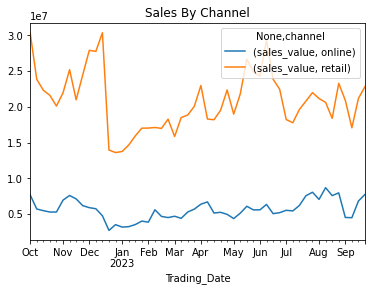

In [28]:
sales_tbl_ByChannel_plotting_pt.plot.line(title="Sales By Channel");
plt.show(block=True);

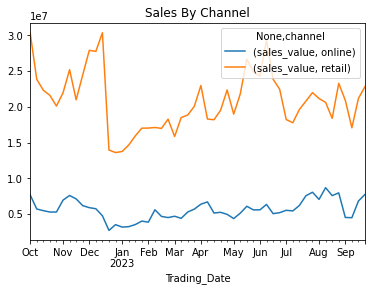

In [29]:
# FULL PRICE sales
sales_tbl_ByChannel_plotting_pt.plot.line(title="Sales By Channel");
plt.show(block=True);

In [30]:
sales_data_path = "/data/dt/Sales_weeklyByChannel_oneYearData.parquet"
sales_final_tbl.to_parquet(sales_data_path, index = False)
upload_data("reporting", f"ReturnsUseCase/{sales_data_path.split('/')[3]}", sales_data_path, account_name, account_key)